In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV



traindata = pd.read_csv(r'CongressionalVotingID.shuf.lrn.csv', na_values=['unknown']) 
testdata = pd.read_csv(r'CongressionalVotingID.shuf.tes.csv', na_values=['unknown'])
resultdata = pd.read_csv(r'CongressionalVotingID.shuf.sol.ex.csv') 

In [137]:

traindata.replace(('y', 'n'), (1, 0), inplace=True)
testdata.replace(('y', 'n'), (1, 0), inplace=True)
traindata.head()


,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,356,republican,1,0,1,1,0,0,0,1,1,1,0,0,0,1,1,1
1,29,republican,1,0,0,1,1,0,1,1,1,0,0,1,1,1,0,1
2,344,republican,0,0,0,1,1,0,1,0,1,1,0,0,0,1,0,1
3,396,democrat,1,1,1,nan,0,0,0,1,0,0,1,nan,0,0,1,1
4,32,democrat,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,nan


In [138]:
traindata.info()
traindata.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID                                      218 non-null    int64  
 1   class                                   218 non-null    object 
 2   handicapped-infants                     211 non-null    float64
 3   water-project-cost-sharing              194 non-null    float64
 4   adoption-of-the-budget-resolution       209 non-null    float64
 5   physician-fee-freeze                    211 non-null    float64
 6   el-salvador-aid                         212 non-null    float64
 7   religious-groups-in-schools             213 non-null    float64
 8   anti-satellite-test-ban                 211 non-null    float64
 9   aid-to-nicaraguan-contras               213 non-null    float64
 10  mx-missile                              209 non-null    float6

ID                                         0
class                                      0
handicapped-infants                        7
water-project-cost-sharing                24
adoption-of-the-budget-resolution          9
physician-fee-freeze                       7
el-salvador-aid                            6
religious-groups-in-schools                5
anti-satellite-test-ban                    7
aid-to-nicaraguan-contras                  5
mx-missile                                 9
immigration                                2
synfuels-crporation-cutback               12
education-spending                        15
superfund-right-to-sue                    12
crime                                      8
duty-free-exports                         19
export-administration-act-south-africa    50
dtype: int64

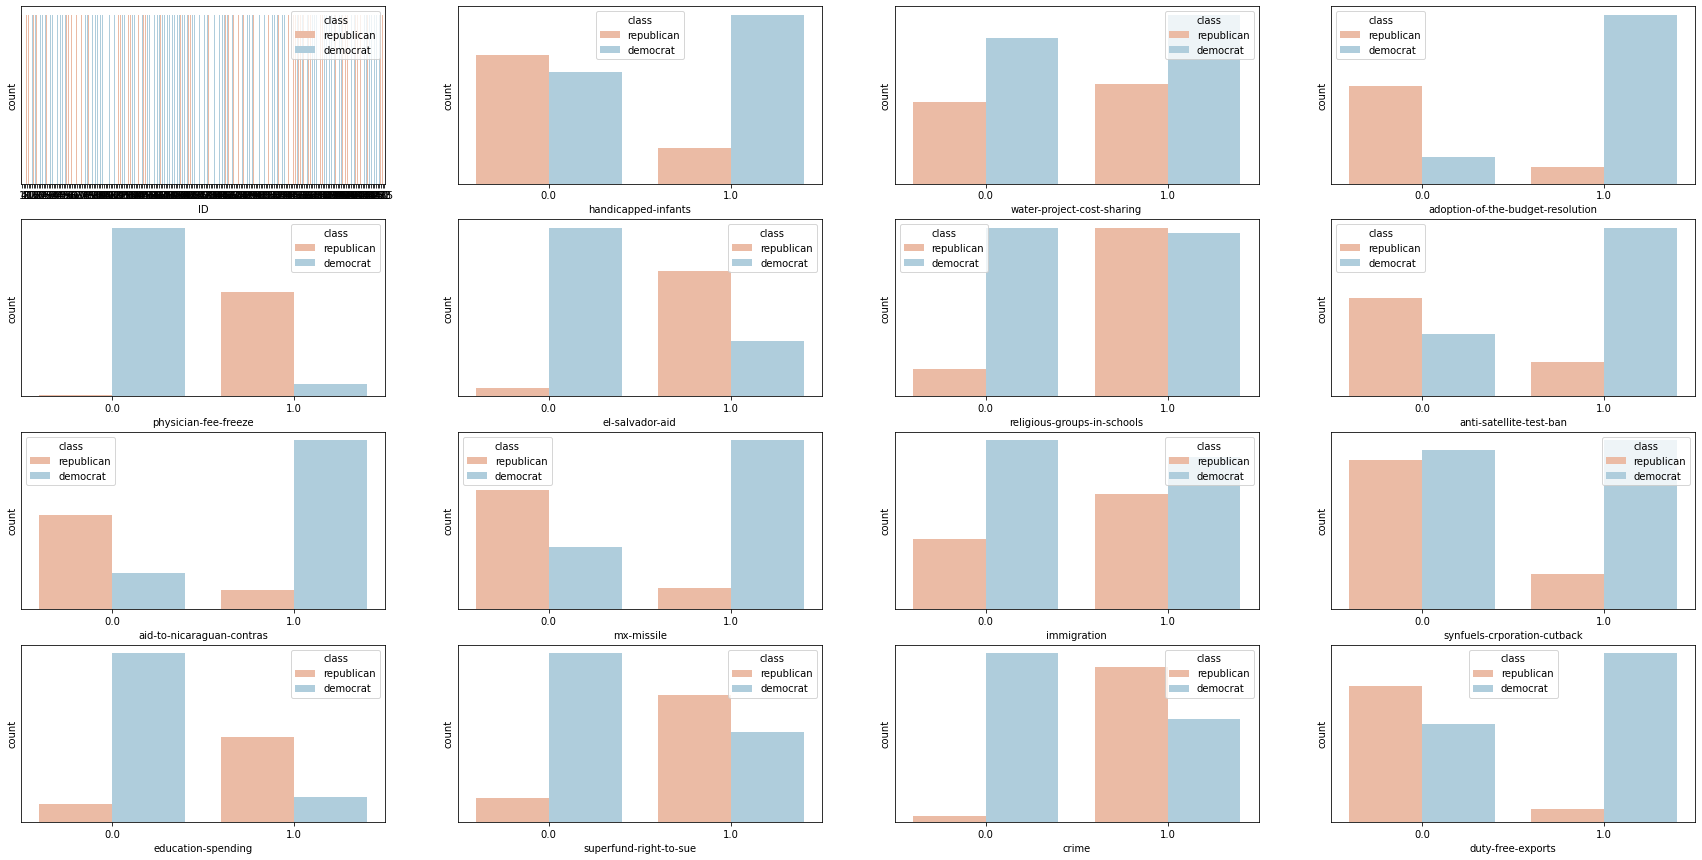

In [139]:
ind = traindata.drop('class', axis=1).columns 
z = 0
fig, axes = plt.subplots(4, 4, figsize=(30, 15))
for i in range(4): 

    for j in range(4):        
        sns.countplot(x = ind[z+j], hue='class', data=traindata, palette='RdBu', ax=axes[i][j])
    
        axes[i][j].set_yticks([])
    z = z + j + 1
plt.show()


In [140]:
traindata.replace(('democrat', 'republican'), (0, 1), inplace=True)
resultdata.replace(('democrat', 'republican'), (0, 1), inplace=True)

In [141]:
y = traindata['class'].values
X = traindata.drop('class', axis=1).values
resultdata = resultdata.drop('ID', axis=1).values
Y = testdata



In [142]:
X

array([[356.,   1.,   0., ...,   1.,   1.,   1.],
       [ 29.,   1.,   0., ...,   1.,   0.,   1.],
       [344.,   0.,   0., ...,   1.,   0.,   1.],
       ...,
       [345.,   0.,   0., ...,   0.,   1.,   1.],
       [108.,   0.,  nan, ...,   1.,  nan,  nan],
       [ 53.,   1.,   1., ...,   0.,  nan,  nan]])

In [143]:
imp = SimpleImputer(strategy="most_frequent")
X = imp.fit_transform(X)


In [144]:
imp = SimpleImputer(strategy="most_frequent")
Y =  imp.fit_transform(Y)

In [145]:
traindata.head()

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,356,1,1,0,1,1,0,0,0,1,1,1,0,0,0,1,1,1
1,29,1,1,0,0,1,1,0,1,1,1,0,0,1,1,1,0,1
2,344,1,0,0,0,1,1,0,1,0,1,1,0,0,0,1,0,1
3,396,0,1,1,1,nan,0,0,0,1,0,0,1,nan,0,0,1,1
4,32,0,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,nan


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [147]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)

acc = clf.score(X_test, y_test)
acc

0.6666666666666666

In [148]:
from sklearn.ensemble import RandomForestClassifier
clf1=RandomForestClassifier(n_estimators=100)
clf1.fit(X_train,y_train)

RandomForestClassifier()

In [149]:
y_pred=clf1.predict(X_test)

In [150]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9242424242424242


In [151]:
def evaluate_model(X, y, model):
    K = 5
    R = 3
    # validação cruzada
    cv = RepeatedStratifiedKFold(n_splits=K, n_repeats=R, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# seleção de modelos 
def get_models():
    models, names = list(), list()
    # SVM
    models.append(LogisticRegression())
    names.append('LG')
    
    models.append(KNeighborsClassifier())
    names.append('KNN')
    
    models.append(RandomForestClassifier(n_estimators=1000))
    names.append('RF')
    
    models.append(ExtraTreesClassifier(n_estimators=1000))
    names.append('ET')
    
    return models, names

# avaiação do modelo AUC
def evaluate(model, test_features, test_labels):
    probs_votos = model.predict_proba(test_features)
    accuracy = roc_auc_score(test_labels, probs_votos[:,1])
    return accuracy

>LG 0.937 (0.028)
>KNN 0.592 (0.061)
>RF 0.946 (0.028)
>ET 0.946 (0.023)


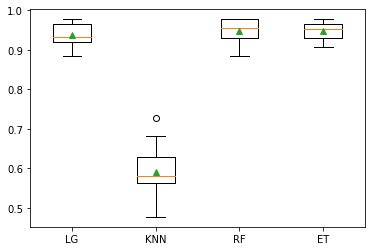

In [152]:
models, names = get_models()

results = list()

for i in range(len(models)):
    scores = evaluate_model(X, y, models[i])
    results.append(scores)
    print('>%s %.3f (%.3f)' % (names[i], np.mean(scores), np.std(scores)))

plt.boxplot(results, labels=names, showmeans=True)
plt.show()

# Logistic Regression

In [224]:

#creating the model
model = LogisticRegression(random_state=42, solver='newton-cg',multi_class='ovr', warm_start=True, class_weight='dict', max_iter=50000).fit(X, y)

#fitting data to the model
model.fit(X_train, y_train)



#calculating the probabilities
y_pred_proba = model.predict_proba(X_test)



#printing the accuarcy

accuracy_training_set = model.score(X_train, y_train)
print(accuracy_training_set)

accuracy_testing_set = model.score(X_test, y_test)
print(accuracy_testing_set)




0.9605263157894737
0.9393939393939394


In [225]:
X_end_test = testdata.values

imp = SimpleImputer(strategy="most_frequent")
X_end_test = imp.fit_transform(X_end_test)

prediction = model.predict(X_end_test)
prediction = pd.DataFrame(prediction)

prediction = prediction.rename({0: 'class'}, axis='columns')
prediction.replace((0, 1), ('democrat', 'republican'), inplace=True)
prediction

,class
0,republican
1,republican
2,democrat
3,republican
4,republican
...,...
212,democrat
213,republican
214,democrat
215,democrat


In [226]:

solution = pd.DataFrame(X_end_test)
solution = solution.rename({0: 'id'}, axis='columns')
solution = pd.DataFrame(solution['id'])
solution

,id
0,107
1,241
2,51
3,428
4,376
...,...
212,253
213,306
214,263
215,65


In [227]:

solution = pd.merge(solution, prediction, left_index=True, right_index=True)
solution


solution.id = solution.id.astype(int)
#pd.options.display.float_format = '{:,.0f}'.format
solution


,id,class
0,107,republican
1,241,republican
2,51,democrat
3,428,republican
4,376,republican
...,...,...
212,253,democrat
213,306,republican
214,263,democrat
215,65,democrat


In [228]:
solution.to_csv('solution-group6.csv', sep=',', index=False)